**importing the required libraries**

In [158]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
import mplsoccer

**Getting the input from the user and parsing the content**

In [159]:
player_id = str(input("Please, Enter player id: "))
url = 'https://understat.com/player/'+ player_id
r = requests.get(url)
soup = BeautifulSoup(r.content, 'lxml')
scripts = soup.find_all('script')
player_name = soup.find_all('div',{"class":"header-wrapper"})
player_name = player_name[0].text.strip()
print(player_name, '\t', url)

Lionel Messi 	 https://understat.com/player/2097


In [160]:
strings = scripts[1].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
json_data = json.loads(json_data)

# **Shot Zones**

In [189]:
def ShotsArea():
    shotzone = []
    season = []
    g = []
    sh = []
    xg = []
    assists = []
    kp = []
    xa = []
    npg = []
    npxg = []

    for year in list(json_data['shotZones'].keys()):
        for type in json_data['shotZones'][year].keys():
            for param in json_data['shotZones'][year][type].keys():
                if param == "shotZones":
                    shotzone.append(json_data['shotZones'][year][type][param])
                elif param == "season":
                    season.append(json_data['shotZones'][year][type][param])
                elif param == "goals":
                    g.append(json_data['shotZones'][year][type][param])
                elif param == "shots":
                    sh.append(json_data['shotZones'][year][type][param])
                elif param == "xG":
                    xg.append(json_data['shotZones'][year][type][param])
                elif param == "assists":
                    assists.append(json_data['shotZones'][year][type][param])
                elif param == "key_passes":
                    kp.append(json_data['shotZones'][year][type][param])
                elif param == "xA":
                    xa.append(json_data['shotZones'][year][type][param])
                elif param == "npg":
                    npg.append(json_data['shotZones'][year][type][param])
                elif param == "npxG":
                    npxg.append(json_data['shotZones'][year][type][param])

    df = pd.DataFrame({"shotZones":shotzone,"season":season,"goals":g,"shots":sh,"xG":xg,"assists":assists,"key_passes":kp,"xA":xa,"npg":npg,"npxG":npxg})
    for x in ["xG","xA","npxG"]:
        df[x] = df[x].astype(float).round(3)
    for x in ["goals","shots","assists","key_passes","npg"]:
        df[x] = df[x].astype(int)
    display(df)

ShotsArea()


,shotZones,season,goals,shots,xG,assists,key_passes,xA,npg,npxG
0,shotOboxTotal,2014,4,59,3.835,1,23,0.877,4,3.835
1,shotPenaltyArea,2014,32,112,22.977,14,61,12.713,27,18.518
2,shotSixYardBox,2014,7,16,9.080,3,9,4.022,7,9.080
3,shotOboxTotal,2015,6,65,3.638,1,10,0.663,6,3.638
4,shotPenaltyArea,2015,17,84,19.504,13,56,13.019,14,14.302
5,shotSixYardBox,2015,3,9,3.960,2,7,2.189,3,3.960
6,shotOboxTotal,2016,9,75,4.817,0,13,0.500,9,4.817
7,shotPenaltyArea,2016,24,98,18.304,6,56,10.104,18,13.102
8,shotSixYardBox,2016,4,6,3.764,3,9,3.351,4,3.764
9,shotOboxTotal,2017,8,92,5.347,0,18,0.561,8,5.347


In [195]:
df = pd.read_csv('shots_map.csv')
df['Home team'].value_counts()

Barcelona              698
Paris Saint Germain     49
Valencia                39
Alaves                  33
Villarreal              33
Sevilla                 32
Atletico Madrid         32
Real Madrid             31
Deportivo La Coruna     25
Eibar                   24
Real Sociedad           24
Athletic Club           23
Levante                 23
Celta Vigo              21
Espanyol                21
Getafe                  20
Real Betis              19
Real Valladolid         15
Las Palmas              14
Granada                 14
Malaga                  14
Rayo Vallecano          13
Leganes                 12
Osasuna                 12
Cadiz                   10
Girona                   9
Cordoba                  8
Clermont Foot            8
SD Huesca                8
Almeria                  6
Montpellier              6
Rennes                   5
Lens                     5
Lille                    5
Sporting Gijon           4
Marseille                4
Lorient                  4
E

# **Season Stats**

In [167]:
def SeasonStats():
    
    games = []
    goals = []
    shots = []
    mins = []
    xg = []
    assists = []
    xa = []
    season = []
    team = []
    yellow = []
    red = []
    np_g = []
    np_xg = []
    xg_chain = []
    xg_buildup = []

    strings = scripts[1].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)

    for x in json_data["season"]:
        games.append(int(x["games"]))
        goals.append(int(x["goals"]))
        shots.append(int(x["shots"]))
        xg.append(float(x["xG"]))
        assists.append(int(x["assists"]))
        xa.append(float(x["xA"]))
        season.append(x["season"])
        team.append(x["team"])
        yellow.append(int(x["yellow"]))
        red.append(x["red"])
        np_g.append(x["npg"])
        np_xg.append(x["npxG"])
        xg_chain.append(x["xGChain"])
        xg_buildup.append(x["xGBuildup"])
        mins.append(int(x["time"]))

    df = pd.DataFrame({ 'Season': season, 'Team': team, 'Mins': mins,'App.': games,
                    'Goals': goals, 'Shots': shots, 'xG': xg, 'Assists': assists, 
                'xA': xa, 'Yellow cards': yellow, 'Red cards': red, 'npG': np_g,
                    'npxG': np_xg, 'xGChain': xg_chain, 'xGBuildup': xg_buildup})
    for col in ["xG","xA",'npxG','xGChain','xGBuildup']:
        df[col] = df[col].astype(float).round(3)
    #season = input("Please, Enter season: ")
    display(df.reset_index(drop=True))

SeasonStats()

,Season,Team,Mins,App.,Goals,Shots,xG,Assists,xA,Yellow cards,Red cards,npG,npxG,xGChain,xGBuildup
0,2022,Paris Saint Germain,90,1,2,6,1.992,1,0.915,0,0,2,1.992,2.920,0.606
1,2021,Paris Saint Germain,2155,26,6,89,9.880,13,8.681,0,0,6,9.880,27.219,13.841
2,2020,Barcelona,3017,35,30,195,26.677,9,11.423,4,0,27,22.960,37.907,20.337
3,2019,Barcelona,2876,33,25,159,20.850,20,16.593,4,0,20,17.133,34.923,13.538
4,2018,Barcelona,2704,34,36,170,25.997,13,15.335,3,0,32,22.281,38.460,10.699
5,2017,Barcelona,2995,36,34,196,28.946,12,15.100,3,0,32,25.973,48.181,21.634
6,2016,Barcelona,2832,34,37,179,26.885,9,13.955,6,0,31,21.682,42.525,18.134
7,2015,Barcelona,2726,33,26,158,27.102,16,15.871,3,0,23,21.899,41.997,15.196
8,2014,Barcelona,3374,38,43,187,35.892,18,17.612,4,0,38,31.432,54.754,19.757


# **To get team related info**

In [ ]:
{'Barcelona':[2014,2015],"Paris Saint German":[2021,2022]}

# **Shots (X,Y) Data**


In [168]:
def tabular_shots_data():
    X = []
    Y = []
    xg = []
    result = []
    min = []
    Assisted_by = []
    home_team = []
    away_team = []
    last_action = []
    situations = []
    seasons =  []
    shot_type = []
    dates = []

    strings = scripts[3].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)

    for i in range(len(json_data)):
        X.append(float((json_data[i]['X'])))
        Y.append(float((json_data[i]['Y'])))
        xg.append(float((json_data[i]['xG'])))
        result.append(json_data[i]['result'])
        min.append(int((json_data[i]['minute'])))
        Assisted_by.append(json_data[i]['player_assisted'])
        home_team.append(json_data[i]['h_team'])
        away_team.append(json_data[i]['a_team'])
        last_action.append(json_data[i]['lastAction'])
        situations.append(json_data[i]['situation'])
        seasons.append(int(json_data[i]['season']))
        shot_type.append(json_data[i]['shotType'])
        dates.append(json_data[i]['date'])

    df = pd.DataFrame({'Season':seasons, 'Date':dates,'Home team':home_team, 'Away team':away_team,'X':X, 'Y':Y, 'xG':xg, 'Output':result, 'Minute':min,'Assisted by':Assisted_by, 'Assist type':last_action, 'Situation':situations,'Shot type':shot_type})
    for i in range(len(df)):
        df['X'][i] = df['X'][i]*120 - 0.3
        df['Y'][i] = df['Y'][i]*80

    df.to_csv('shots_map.csv')   
        
    display(df)

tabular_shots_data()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14036\4228890047.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X'][i] = df['X'][i]*120 - 0.3
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14036\4228890047.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y'][i] = df['Y'][i]*80


,Season,Date,Home team,Away team,X,Y,xG,Output,Minute,Assisted by,Assist type,Situation,Shot type
0,2014,2014-08-24 20:00:00,Barcelona,Elche,94.019998,41.600000,0.038670,MissedShots,22,Rafinha,Pass,OpenPlay,LeftFoot
1,2014,2014-08-24 20:00:00,Barcelona,Elche,103.139996,49.200000,0.068702,Goal,41,Sergio Busquets,BallRecovery,OpenPlay,LeftFoot
2,2014,2014-08-24 20:00:00,Barcelona,Elche,102.900000,34.800000,0.150343,Goal,62,None,TakeOn,OpenPlay,LeftFoot
3,2014,2014-08-31 18:00:00,Villarreal,Barcelona,97.860004,30.400000,0.045503,SavedShot,3,Pedro,Pass,OpenPlay,LeftFoot
4,2014,2014-08-31 18:00:00,Villarreal,Barcelona,103.980002,15.360001,0.065317,SavedShot,27,None,Standard,DirectFreekick,LeftFoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,2022,2022-08-06 19:00:00,Clermont Foot,Paris Saint Germain,91.260004,40.000000,0.079704,BlockedShot,49,None,Standard,DirectFreekick,LeftFoot
1335,2022,2022-08-06 19:00:00,Clermont Foot,Paris Saint Germain,106.139996,49.760001,0.115987,MissedShots,68,Nuno Mendes,Pass,OpenPlay,LeftFoot
1336,2022,2022-08-06 19:00:00,Clermont Foot,Paris Saint Germain,109.619998,42.239999,0.601883,Goal,79,Neymar,Pass,OpenPlay,LeftFoot
1337,2022,2022-08-06 19:00:00,Clermont Foot,Paris Saint Germain,109.619998,39.679999,0.578814,Goal,85,Leandro Paredes,Throughball,OpenPlay,LeftFoot


# **Shots map**

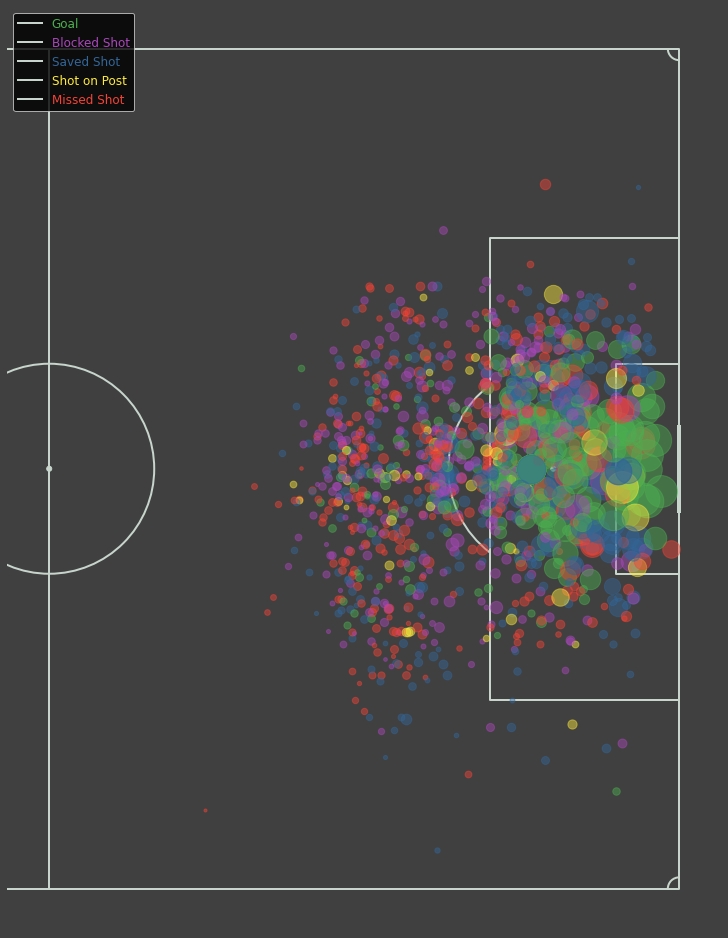

In [176]:
def plot_shots():
    df = pd.read_csv('shots_map.csv')
    fig, ax = plt.subplots(figsize=(13*2,8.5*2))
    fig.set_facecolor('#404040')
    ax.patch.set_facecolor('#404040')

    #The statsbomb pitch from mplsoccer
    pitch = mplsoccer.Pitch(pitch_type='statsbomb',
                pitch_color='#404040', line_color='#c7d5cc',half=True,corner_arcs=True)

    pitch.draw(ax=ax)

    #I invert the axis to make it so I am viewing it how I want
    plt.gca().invert_yaxis()

    #plot the points, you can use a for loop to plot the different outcomes if you want
    for i in range(len(df)):
        if df.Output[i] == 'Goal':
            plt.scatter(df['X'][i],df['Y'][i],c="#4CAF50",s=df['xG'][i]*1100,alpha=0.45,marker='o',edgecolors='#4CAF50')
        elif df.Output[i] == 'BlockedShot':
            plt.scatter(df['X'][i],df['Y'][i],c="#AB47BC",s=df['xG'][i]*1100,alpha=0.45,marker='o',edgecolors='#AB47BC')
        elif df.Output[i] == 'SavedShot':
            plt.scatter(df['X'][i],df['Y'][i],c="#336699",s=df['xG'][i]*1100,alpha=0.45,marker='o',edgecolors='#336699')
        elif df.Output[i] == 'ShotOnPost':
            plt.scatter(df['X'][i],df['Y'][i],c="#FFEB3B",s=df['xG'][i]*1100,alpha=0.45,marker='o',edgecolors='#FFEB3B')
        else:
            plt.scatter(df['X'][i],df['Y'][i],s=df['xG'][i]*1100,c='#F44336',alpha=.45,marker='o',edgecolors='#F44336')

    plt.legend(['Goal','Blocked Shot','Saved Shot','Shot on Post','Missed Shot'],
                labelcolor = ['#4CAF50','#AB47BC','#336699','#FFEB3B','#F44336'],
                                  facecolor='black',loc='upper left',fontsize=12)

plot_shots()

# **Summary data for every single match**

In [170]:
def get_matches_data(player_id):
    strings = scripts[4].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)
    goals=[]
    shots=[]
    xg=[]
    time_played=[]
    postion=[]
    h_team=[]
    a_team=[]
    season=[]
    dates = []
    xA = []
    assists = []
    key_passes = []
    npg = []
    npxG = []
    xGChain = []
    xGBuildup = []
    for i in range(len(json_data)):
        goals.append((json_data[i]['goals']))
        shots.append((json_data[i]['shots']))
        xg.append(json_data[i]['xG'])
        time_played.append(json_data[i]['time'])
        postion.append(json_data[i]['position'])
        h_team.append(json_data[i]['h_team'])
        a_team.append(json_data[i]['a_team'])
        season.append(json_data[i]['season'])
        dates.append(json_data[i]['date'])
        xA.append(json_data[i]['xA'])
        assists.append((json_data[i]['assists']))
        key_passes.append(json_data[i]['key_passes'])
        npg.append(json_data[i]['npg'])
        npxG.append(json_data[i]['npxG'])
        xGChain.append(json_data[i]['xGChain'])
        xGBuildup.append(json_data[i]['xGBuildup'])

    df = pd.DataFrame({'Position':postion, 'Home team':h_team, 'Away team':a_team, 'Season':season,
                                'Date':dates,'goals Scored':goals,'Non-penalty goals':npg,'Assists':assists,
                                 'shots':shots,'Key passes':key_passes,'Time played':time_played, 'xG':xg,
                                   'xA':xA,'Non-penalty xG':npxG,'xG Chain':xGChain, 'xG Buildup':xGBuildup})

    for col in list(df.columns)[11:]:
        df[col] = df[col].astype(float).round(3)
    
    for col in list(df.columns)[5:11]:
        df[col] = df[col].astype(int)
        
    return df

x = get_matches_data(player_id)
display(x)

,Position,Home team,Away team,Season,Date,goals Scored,Non-penalty goals,Assists,shots,Key passes,Time played,xG,xA,Non-penalty xG,xG Chain,xG Buildup
0,FW,Clermont Foot,Paris Saint Germain,2022,2022-08-06,2,2,1,6,4,90,1.992,0.915,1.992,2.920,0.606
1,AMC,Paris Saint Germain,Metz,2021,2022-05-21,0,0,1,3,4,90,0.269,0.535,0.269,2.063,1.636
2,FW,Montpellier,Paris Saint Germain,2021,2022-05-14,2,2,0,6,4,90,1.207,0.379,1.207,1.525,0.147
3,AMC,Paris Saint Germain,Troyes,2021,2022-05-08,0,0,0,6,1,90,0.420,0.015,0.420,0.418,0.060
4,FWR,Strasbourg,Paris Saint Germain,2021,2022-04-29,0,0,0,3,0,90,0.206,0.000,0.206,0.757,0.603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,FW,Malaga,Barcelona,2014,2014-09-24,0,0,0,2,1,90,0.163,0.059,0.163,0.263,0.156
266,FW,Levante,Barcelona,2014,2014-09-21,1,1,2,3,5,90,1.237,1.275,0.493,2.631,0.914
267,FW,Barcelona,Athletic Club,2014,2014-09-13,0,0,2,2,6,90,0.141,1.624,0.141,1.978,1.439
268,FW,Villarreal,Barcelona,2014,2014-08-31,0,0,0,8,4,90,0.920,0.258,0.920,1.061,0.290


# **Statistics against a particular team**

In [171]:
def player_against_team(team,get_matches_data):
    df = get_matches_data
    df = df.loc[(df['Away team'] == team) | (df['Home team']== team)].reset_index(drop=True)
    print(f"{player_name} stats Against {team} :")
    print("*   Time played: {} minutes in {} matches ".format((df['Time played'].sum()),len(df['Time played'])))
    print("*   Goals scored: {} Goals and {} assists ".format((df['goals Scored'].sum()),int(df['Assists'].sum())))
    print("*   Expected Goals: {} XG and {} XA ".format(df['xG'].sum().round(3),df['xA'].sum().round(3)))
    print("*   Shots: {} Shots ".format(int(df['shots'].sum())))
    print("*   Key passes: {} Key passes ".format(int(df['Key passes'].sum())))
    display(df)

player_against_team('Barcelona',x)

Lionel Messi stats Against Barcelona :
*   Time played: 20524 minutes in 243 matches 
*   Goals scored: 231 Goals and 97 assists 
*   Expected Goals: 192.35 XG and 105.896 XA 
*   Shots: 1244 Shots 
*   Key passes: 596 Key passes 


,Position,Home team,Away team,Season,Date,goals Scored,Non-penalty goals,Assists,shots,Key passes,Time played,xG,xA,Non-penalty xG,xG Chain,xG Buildup
0,FW,Barcelona,Celta Vigo,2020,2021-05-16,1,1,0,7,2,90,0.636,0.192,0.636,1.318,0.693
1,FW,Levante,Barcelona,2020,2021-05-11,1,1,0,6,3,90,0.520,0.821,0.520,1.321,1.117
2,FW,Barcelona,Atletico Madrid,2020,2021-05-08,0,0,0,3,3,90,0.225,0.237,0.225,0.382,0.226
3,FW,Valencia,Barcelona,2020,2021-05-02,2,2,0,5,1,90,1.887,0.478,1.144,1.030,0.918
4,FW,Barcelona,Granada,2020,2021-04-29,1,1,0,6,2,90,0.825,0.117,0.825,1.022,0.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,FW,Malaga,Barcelona,2014,2014-09-24,0,0,0,2,1,90,0.163,0.059,0.163,0.263,0.156
239,FW,Levante,Barcelona,2014,2014-09-21,1,1,2,3,5,90,1.237,1.275,0.493,2.631,0.914
240,FW,Barcelona,Athletic Club,2014,2014-09-13,0,0,2,2,6,90,0.141,1.624,0.141,1.978,1.439
241,FW,Villarreal,Barcelona,2014,2014-08-31,0,0,0,8,4,90,0.920,0.258,0.920,1.061,0.290
